# Méthode d'Archimède

## Présentation de l'activité
- **Niveau de classe :** 
 - Classe de première de la voie générale (spécialité mathématiques).
 - Classe de première de la voie technologique (tronc commun).
- **Référence au programme :** 
 - Spécialité mathématiques de première générale : *Approximation du nombre $\pi$ par la méthode d’Archimède*.
- **Description :** activité d'approximation du nombre $\pi$ permettant de faire travailler les notions de géométrie du plan, les fonctions trigonométriques et les suites.

## Description de la méthode d'Archimède
La méthode d'Archimède permet d'obtenir une approximation du nombre $\pi$. Pour cela on calcule les périmètres de polygones réguliers inscrits et circonscrits à un cercle de rayon $\dfrac{1}{2}$. Plus le nombre de côtés du polygone sera important, plus on se rapprochera du périmètre du cercle, à savoir $\pi$.
![archimede.png](img/archimede.png)

## Calcul du périmètre des polygones

On pose $a_n$ le périmètre d'un polygone régulier ayant $n$ côtés et inscrit dans le cercle de rayon $\dfrac{1}{2}$ et $b_n$ le périmètre d'un polygone régulier ayant $n$ côtés et circonscrit au cercle de rayon $\dfrac{1}{2}$.
On vérifie que :
$$
a_n = n \sin ( \frac{\pi}{n}) \text{ et }b_n = n \tan ( \frac{\pi}{n}).
$$

<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Mathématiques débranchées**

    Demander de faire un dessin des polygones inscrits et circonscrits, puis de démontrer les expressions de $a_n$ et de $b_n$ (à partir des lignes trigonométriques dans un triangle rectangle bien choisi.)


## Implémentation de la méthode 
On peut implémenter cette méthode utilisant les fonctions $\textrm{sinus}$ et $\textrm{tangente}$ (qui étaient inconnues d'Archimède).

In [1]:
from math import sin,tan,pi

def archimedeSimple(n):
    return n*sin(pi/n),n*tan(pi/n)

print(archimedeSimple(5))

(2.938926261462366, 3.6327126400268046)


<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Écrire un programme**

    Écrire une fonction `archimedeSimple` qui prend en paramètre une variable entière $n$ représentant le nombre de côtés des polygones et renvoyant le couple $(a_n,b_n)$. 
- **Expliquer un programme**

    L'illustration géométrique permet de conjecturer que ces deux suites convergent vers le nombre $\pi$. Pour une valeur de $n$ donnée, qui de $a_n$ ou de $b_n$  semble le plus proche de $\pi$ ? Exprimer les écarts entre d'une part $a_n$ et $\pi$ et d'autre part $b_n$ et $\pi$ lorsque les polygones sont des carrés ($n=4$).

## Animation susceptible d'être présentée aux élèves
Cette animation montre sur la figure de gauche les polygones inscrits et circonscrits et donne sur la figure de droite le périmètre de chacun. On peut ainsi visualiser la convergence vers $\pi$.

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle,RegularPolygon
from IPython.display import HTML
import matplotlib.animation
from math import cos

# nombre de cotés maximum - 3
N=15

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 6))
l= .7
ax1.set_xlim(( -l, l))
ax1.set_ylim((-l, l))
ax2.set_xlim(( 4, N+3))
ax2.set_ylim((2.75, 4.25))
approximationsInf = []
approximationsSup = []

cercle = Circle((0, 0), .5, facecolor='none',
                edgecolor=(0, 0, 0), linewidth=2, alpha=0.75)
courbeInf, = ax2.plot([],[],'-o',color="#1e7fcb")
courbeSup, = ax2.plot([],[],'-o',color='orange')

def init():
    return []

def animate(i):
    inf,sup = archimedeSimple(i+4)
    approximationsInf.append(inf)
    approximationsSup.append(sup)
    ax1.clear()
    ax1.set_xlim(( -l, l))
    ax1.set_ylim((-l, l))
    ax1.add_patch(cercle)
    long = 0.5/cos(pi/(i+4))
    PI = RegularPolygon(numVertices = 4+i,xy=(0, 0), radius=.5, orientation=0.79,edgecolor="#1e7fcb", facecolor='none',
                linewidth=2, alpha=0.5)
    PS = RegularPolygon((0, 0), 4+i, radius=long, orientation=.79, facecolor='none',
                edgecolor='orange', linewidth=2, alpha=0.5)
    ax1.add_patch(PI)
    ax1.add_patch(PS)
    ax1.set_title('{} côtés'.format(i+4),color="#1e7fcb",fontsize=14)
    courbeInf.set_data(range(4,i+5),approximationsInf)
    courbeSup.set_data(range(4,i+5),approximationsSup)
    return PI

ax2.plot([4,3+N],[pi,pi],'--',color='green')
ax2.legend(['Polygones intérieurs','Polygones extérieurs','$\pi$'])

plt.close ()
ani = matplotlib.animation.FuncAnimation(fig, animate,init_func=init,frames=N,blit=False,interval=500)
# l'un ou l'autre
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())

## Accélération de la convergence

Pour tout entier naturel $n$, on pose $\alpha_n=a_ {2^n}$ et $\beta_n=b_{2^n} $.


$$
\lim _{n\rightarrow +\infty} \alpha_n = \lim _{n\rightarrow +\infty} \beta_n = \pi.
$$

On peut démontrer que 
$$
b_{2n} = \frac{2a_nb_n}{a_n+b_n} \text{ et }a_{2n}=\sqrt{a_nb_{2n}}.
$$

En déduire que $\alpha_n=\sqrt{\alpha_{n-1}\beta_n}$ et 
$\beta_n=\dfrac{2\alpha_{n-1}\beta_{n-1}}{\alpha_{n-1}+\beta_{n-1}}$.

<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Mathématiques débranchées**

    La démonstration des deux premières égalités utilise des formules de trigonométrie (lignes trigonométriques d'un angle double).
- **Mathématiques débranchées**

    Expliquer la différence entre le mode de définition d'une part des suites $(a_n)$ et $(b_n)$ et d'autre part des suites $(a_{2^n})$ et $(b_{2^n})$.

## Programmation des suites $(a_{2^n})$ et $(b_{2^n})$
Dans cette partie, on utilise les relations précédentes pour calculer les termes des suites $(a_{2^n})$ et $(b_{2^n})$.

In [3]:
from math import sqrt

def archimede(n):
    a = 2*sqrt(2)
    b = 4
    for i in range(n):
        b = (2*a*b)/(a+b)
        a = sqrt(b*a)
    return a,b
print(archimede(10))

(3.141592345570118, 3.1415932696293076)


<div class="alert alert-info">

Suggestions pédagogiques
</div>

- **Calculer**

    On peut demander dans un premier temps à l'élève ce que valent $a_4$ et $b_4$.
- **Expliquer un programme** 
  - Que représentent les lignes 4 et 5 ?
  - Pourquoi calcule-t-on $b$ avant $a$ dans les lignes 7 et 8 ?
- **Compléter un programme**

    Le programme précédent étant fourni en remplaçant les lignes 7 et 8 par `b=...` et `a=...`, demander aux élèves de compléter les lignes 7 et 8.
- **Écrire un programme**

    Écrire le programme `archimede`

## Convergence de la deuxième méthode

Le programme suivant permet de visualiser la convergence vers $\pi$ par la méthode 2.

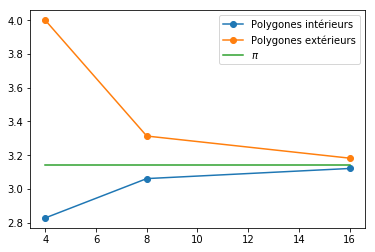

In [6]:
# nombre d'itérations (on initialise au cas du carré)
N = 3
approximationsInf = []
approximationsSup = []
abscisse = []

for i in range(N):
    abscisse.append(2**(i+2))
    inf,sup = archimede(i)
    approximationsInf.append(inf)
    approximationsSup.append(sup)


plt.plot(abscisse,approximationsInf,'-o')
plt.plot(abscisse,approximationsSup ,'-o')
plt.plot([4,2**(N+1)],[pi,pi])
plt.legend(['Polygones intérieurs','Polygones extérieurs','$\pi$'])
plt.show()

## Animation susceptible d'être présentée aux élèves
Cette animation montre la convergence vers $\pi$ de la deuxième méthode. On peut constater que la convergence semble très rapide. La section suivante permettra de comparer les deux méthodes.

In [7]:
# nombre d'itérations (on initialise au cas du carré)
N = 4

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 6))
l= .7
ax1.set_xlim(( -l, l))
ax1.set_ylim((-l, l))
ax2.set_xlim(( 4, 2**(N+1)))
ax2.set_ylim((3.05, 3.35))
approximationsInf = []
approximationsSup = []

cercle = Circle((0, 0), .5, facecolor='none',
                edgecolor=(0, 0, 0), linewidth=2, alpha=0.75)
courbeInf, = ax2.plot([],[],'-o',color="#1e7fcb")
courbeSup, = ax2.plot([],[],'-o',color='orange')
abscisse = []

def init():
    return []

def animate(i):
    abscisse.append(2**(i+2))
    inf,sup = archimede(i)
    approximationsInf.append(inf)
    approximationsSup.append(sup)
    ax1.clear()
    ax1.set_xlim(( -l, l))
    ax1.set_ylim((-l, l))
    ax1.add_patch(cercle)
    long = 0.5/cos(pi/(4*2**i))
    PI = RegularPolygon(numVertices = 4*2**i,xy=(0, 0), radius=.5, orientation=0.79,edgecolor="#1e7fcb", facecolor='none',
                linewidth=2, alpha=0.5)
    PS = RegularPolygon((0, 0), 4*2**i, radius=long, orientation=.79, facecolor='none',
                edgecolor='orange', linewidth=2, alpha=0.5)
    ax1.add_patch(PI)
    ax1.add_patch(PS)
    ax1.set_title('{} côtés'.format(4*2**i),color="#1e7fcb",fontsize=14)
    courbeInf.set_data(abscisse,approximationsInf)
    courbeSup.set_data(abscisse,approximationsSup)
    return PI,

ax2.plot([4,2**(N+1)],[pi,pi],'--',color='green')
ax2.legend(['Polygones intérieurs','Polygones extérieurs','$\pi$'])

plt.close ()
ani = matplotlib.animation.FuncAnimation(fig, animate,init_func=init,  frames=N,blit=False,interval=750)
# l'un ou l'autre
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())

## Précision

On cherche une valeur approchée de $\pi$ à $10^{-p}$ près. Pour cela, on remarque que 
$$
\forall n>0,\ a_n \leq \pi \leq b_n
$$
Ainsi, il suffit d'avoir $b_n-a_n \leq 10^{-p}$ pour obtenir l'approximation cherchée avec $a_n$ ou $b_n$ au choix.

Le programme `archimedeSimplePrecision` prend en paramètre un entier naturel `p` et renvoie `a`, `b` et `n` tels que
$$b_n-a_n \leq 10^{-p}$$
avec $p$=`p`, $n$=`n`, $a_n$=`a` et $b_n$=`b` et en utilisant la fonction `archimedeSimple`.

In [12]:
def archimedeSimplePrecision(p):
    n = 4
    a,b = archimedeSimple(4)
    while b-a>10**-p:
        n = n+1
        a,b = archimedeSimple(n)
    return a,b,n
archimedeSimplePrecision(10)

(3.1415926535564602, 3.1415926536564593, 393741)

<div class="alert alert-info">

Suggestions pédagogiques
</div>

* **Expliquer un programme** 
 - A-t-on besoin d'une valeur absolue dans la condition de la ligne 4 ?
 - À quelle condition sort-on de la boucle ?
 - Que représentent `p` et `n`?
* **Compléter un programme**

    Le programme précédent étant fourni en remplaçant les lignes 4 et 5 par `while ...` et `n = ...`, demander aux élèves de compléter les lignes 4 et 5.

Le programme `archimedeSimplePrecision` prend en paramètre un entier naturel `p`et renvoie `a`, `b` et `n`tels que
$$b_n-a_n \leq 10^{-p}$$
avec $p$=`p`, $n$=`n`, $a_n$=`a` et $b_n$=`b` et en utilisant la seconde méthode d'Archimède.

In [10]:
def archimedePrecision(p):
    a = 2*sqrt(2)
    b = 4 
    n = 4 #
    while b-a>10**(-p):
        b = (2*a*b)/(a+b)
        a = sqrt(b*a)
        n = n+1 #
    return a,b,n
archimedePrecision(10)

(3.1415926535709926, 3.141592653627393, 21)

<div class="alert alert-info">

Suggestions pédagogiques
</div>

* **Expliquer un programme** 
 - A-t-on besoin d'une valeur absolue dans la condition de la ligne 4 ?
 - À quelle condition sort-on de la boucle ?
 - Peut-on inverser les lignes 5 et 6 ?
 - Que représentent `p` et `n`?
* **Compléter un programme**

    Le programme précédent étant fourni en remplaçant les lignes 4 et 5 par `while ...` et `b = ...`, demander aux élèves de compléter les lignes 4 et 5.

## Comparaison des méthodes

In [13]:
import matplotlib.pyplot as plt

Le programme suivant nous permet de visualiser la vitesse de convergence de chaque méthode en utilisant la précision. En abscisse, il y a un entier $p$ et en ordonnée $n$ tel que :
$$b_n-a_n \leq 10^{-p}.$$

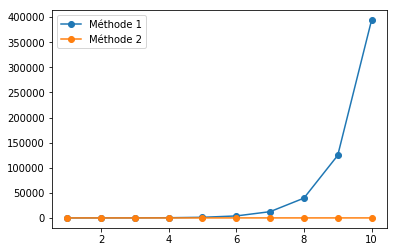

In [20]:
n = 10
abscisse = [i for i in range(1,n+1)]
methode1 = [archimedeSimplePrecision(i)[2] for i in abscisse] 
methode2 = [archimedePrecision(i)[2] for i in abscisse] 

plt.plot(abscisse,methode1,'o-')
plt.plot(abscisse,methode2,'o-')
plt.legend(['Méthode 1','Méthode 2'])
plt.show()

<div class="alert alert-warning">
Remarque
</div>

La méthode 2 est donc beaucoup plus avantageuse car elle converge nettement plus rapidement et parce qu'elle n'utilise pas les fonctions trigonométriques.